In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
def greedyCoreset(data_points, k):
    n=data_points.shape[0]
    coreset = []
    coreset.append(data_points[np.random.choice(n)])
    while len(coreset)<k:
        max_min_dist = -1
        best_point = None
        
        for point in data_points:
            if not any(np.array_equal(point, p) for p in coreset):
                min_dist=np.min(np.linalg.norm(point - np.array(coreset), axis=1))
                
                if min_dist>max_min_dist:
                    max_min_dist=min_dist
                    best_point=point
                    
        coreset.append(best_point)
        
    coreset=np.array(coreset)
    return coreset

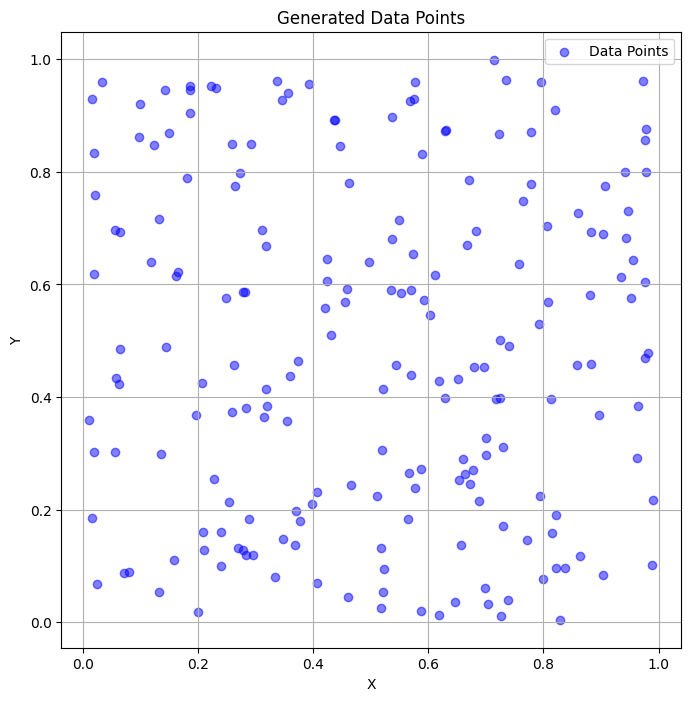

In [4]:
np.random.seed(0)
num_points = 200
data_points = np.random.rand(num_points, 2)

plt.figure(figsize=(8, 8))
plt.scatter(data_points[:, 0], data_points[:, 1], c='b', alpha=0.5, label='Data Points')
plt.title('Generated Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

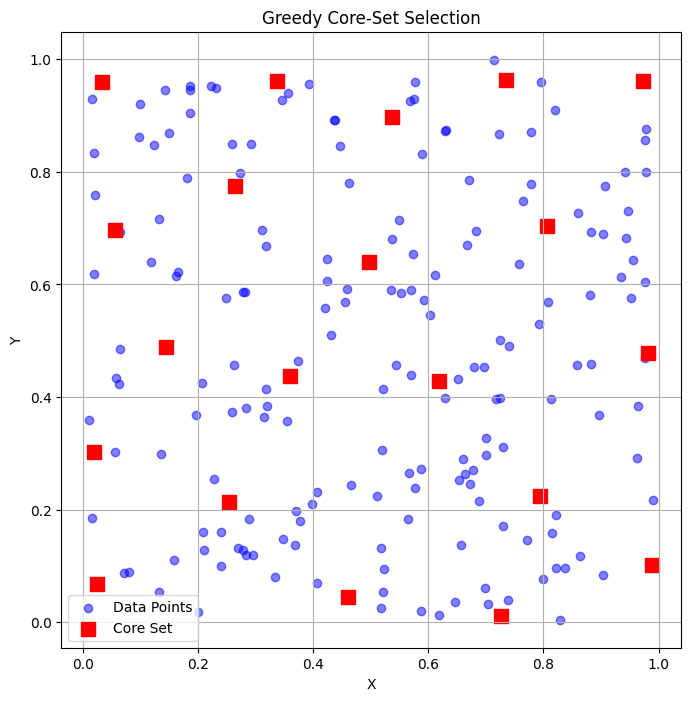

Shape of core-set: (20, 2)


In [5]:
core_set_size = 20
core_set = greedyCoreset(data_points, core_set_size)

plt.figure(figsize=(8, 8))
plt.scatter(data_points[:, 0], data_points[:, 1], c='b', alpha=0.5, label='Data Points')
plt.scatter(core_set[:, 0], core_set[:, 1], c='r', marker='s', s=100, label='Core Set')
plt.title('Greedy Core-Set Selection')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

print("Shape of core-set:", core_set.shape)

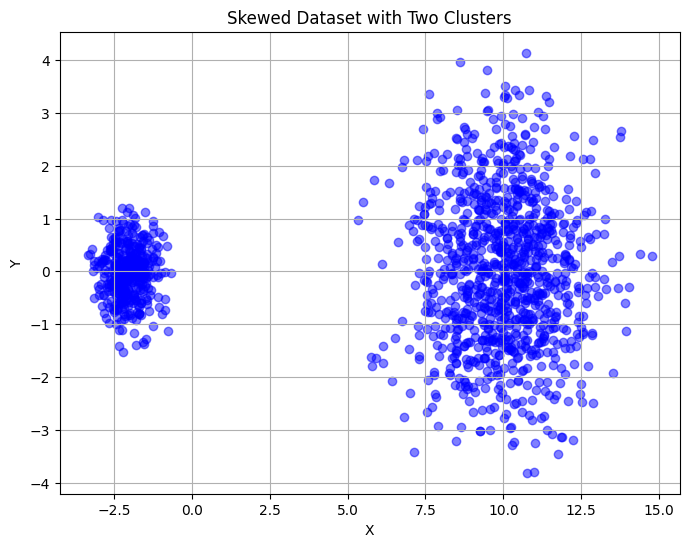

In [6]:
from sklearn.datasets import make_blobs

np.random.seed(0)

# Parameters for the skewed dataset
centers = [[-2, 0], [10, 0]]
cluster_std = [0.5, 1.5]
num_samples = [400, 1000]  # Number of samples in each cluster

# Generate the skewed dataset using make_blobs
X_skewed, _ = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std, random_state=0)

# Visualize the skewed dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_skewed[:, 0], X_skewed[:, 1], c='b', alpha=0.5)
plt.title('Skewed Dataset with Two Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

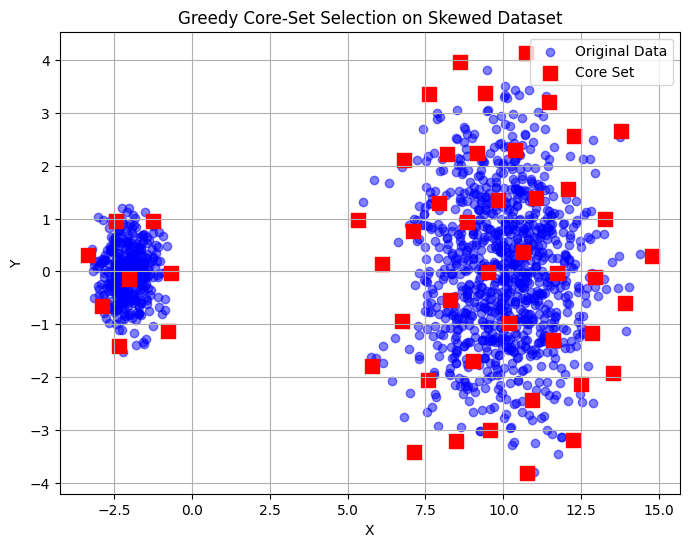

Shape of core-set: (50, 2)


In [7]:
core_set_size = 50

# Apply the greedy core-set selection algorithm to the skewed dataset
core_set_skewed = greedyCoreset(X_skewed, core_set_size)

# Visualize the core-set along with the original skewed dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_skewed[:, 0], X_skewed[:, 1], c='b', alpha=0.5, label='Original Data')
plt.scatter(core_set_skewed[:, 0], core_set_skewed[:, 1], c='r', marker='s', s=100, label='Core Set')
plt.title('Greedy Core-Set Selection on Skewed Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

print("Shape of core-set:", core_set_skewed.shape)

In [8]:
class MLP():
    def __init__(self, data_points):
        self.data_points = data_points

In [9]:
def compute_weights_probab(data_points, m):
    n=data_points.shape[0]
    mean_point = np.mean(data_points, axis=0) 
    
    distances_to_mean = np.linalg.norm(data_points - mean_point, axis=1)**2
    sum_distances_to_mean = np.sum(distances_to_mean)
    
    probabilities = (1 / (2 * n)) + (distances_to_mean / (2 * sum_distances_to_mean))

    weights = 1 / (m * probabilities)

    return weights, probabilities

def sample_weighted_points(data_points, probabilities, m):
    n=data_points.shape[0]

    sampled_indices = np.random.choice(n, size=m, p=probabilities/np.sum(probabilities))
    coreset = data_points[sampled_indices]

    return coreset

def lightweight_coreset(data_points, m):
    weights=compute_weights_probab(data_points, m)[0]
    coreset=sample_weighted_points(data_points, weights, m)
    
    return coreset, weights

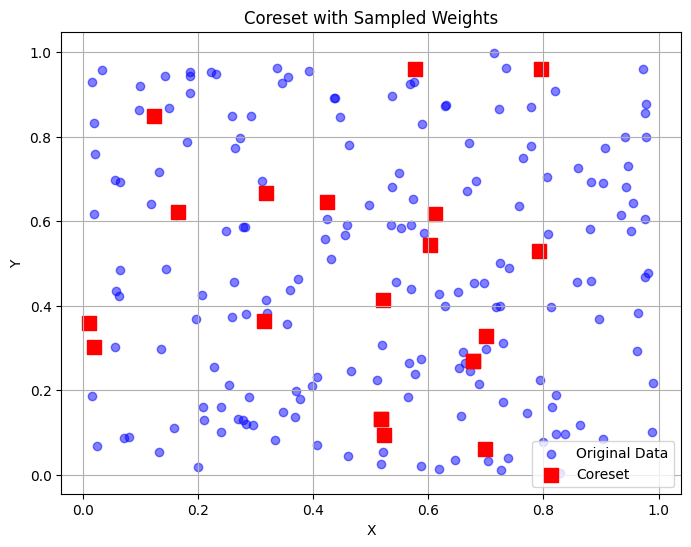

Shape of coreset: (20, 2)
Sampled weights: [15.06690885 18.56853899 16.73271371  9.90960137  8.63189194 13.33266421
  9.15499177  6.47973366  6.37174983  8.58292173  6.83019701 13.03652979
  9.77789078  6.54890011 19.38954843 10.80938529 18.93322197  7.90749326
 17.08062639  8.40673337 17.49663651  8.68196581 14.70334745  8.74634197
 15.30169893 19.27362509  6.10676528  9.2597649  13.76996174 14.7301627
  7.79343226 10.76415911 12.07402757  8.00588267  7.78650286  8.59291088
  8.28834257  7.93810404  9.52844341  9.65823425 16.09291185  8.23485109
 15.24238834 10.41342173  9.04796059 14.18758482  9.25851236 10.93211945
  8.55872877  6.64449596 13.74792522  7.47046484 13.82376648 18.35918553
  7.16835388 11.0973311  13.9293685  12.38672184 10.53895125  9.51175054
 15.51374326  8.45964773 17.72405713  7.61984572 14.58894425 18.27843684
  9.83263024 18.33111703 16.71410687 17.4658159  10.01617245  9.8989688
 10.95472886  6.41467536  7.04239036  7.57214017 11.05044539  7.5048548
 12.6137373

In [10]:
np.random.seed(0)
num_points = 200
data_points = np.random.rand(num_points, 2)

# Set the desired size of the coreset
m = 20

# Compute weights and probabilities
coreset, weights = lightweight_coreset(data_points, m)

# Visualize the constructed coreset along with the original data points
plt.figure(figsize=(8, 6))
plt.scatter(data_points[:, 0], data_points[:, 1], c='b', alpha=0.5, label='Original Data')
plt.scatter(coreset[:, 0], coreset[:, 1], c='r', marker='s', s=100, label='Coreset')
plt.title('Coreset with Sampled Weights')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

print("Shape of coreset:", coreset.shape)
print("Sampled weights:", weights)

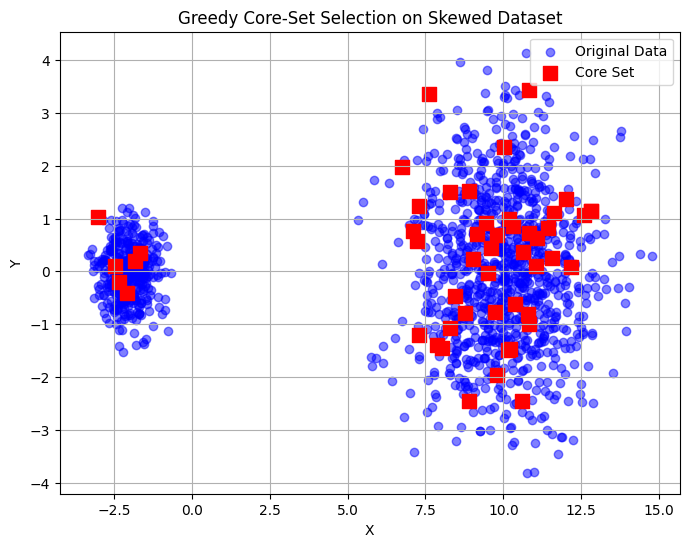

Shape of core-set: (50, 2)


In [11]:
core_set_size = 50

# Apply the greedy core-set selection algorithm to the skewed dataset
core_set_skewed = lightweight_coreset(X_skewed, core_set_size)

# Visualize the core-set along with the original skewed dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_skewed[:, 0], X_skewed[:, 1], c='b', alpha=0.5, label='Original Data')
plt.scatter(core_set_skewed[0][:, 0], core_set_skewed[0][:, 1], c='r', marker='s', s=100, label='Core Set')
plt.title('Greedy Core-Set Selection on Skewed Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

print("Shape of core-set:", core_set_skewed[0].shape)

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

torch.manual_seed(0)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# def train_and_evaluate_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5):
#     for epoch in range(num_epochs):
#         model.train()
#         for inputs, labels in train_loader:
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
        
#         model.eval()
#         val_correct = 0
#         val_total = 0
#         for inputs, labels in val_loader:
#             outputs = model(inputs)
#             _, predicted = torch.max(outputs, 1)
#             val_correct += (predicted == labels).sum().item()
#             val_total += labels.size(0)
        
#         val_accuracy = val_correct / val_total
#         print(f"Epoch {epoch + 1}, Validation Accuracy: {val_accuracy:.4f}")

def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')
        
def train_model2(model, train_loader, criterion, optimizer, num_epochs=5):
    # Assuming `train_loader` is set up to load Fashion MNIST data
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            # Reshape images to [batch_size, 1, 28, 28]
            images = images.view(-1, 1, 28, 28)
            
            # Forward pass
            optimizer.zero_grad()
            outputs = model(images)
            
            # Compute loss
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')


C:\Users\AYUSH MODI\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\AYUSH MODI\AppData\Roaming\Python\Python310\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [38]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

In [39]:
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)
print(len(train_data))

48000


In [40]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [41]:
print(len(train_loader.dataset))

48000


In [78]:
model_full = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_full.parameters(), lr=0.001)

print("Training on Full Fashion MNIST Dataset:")
# train_and_evaluate_model(model, train_loader, val_loader, criterion, optimizer)
# Train the model on the full dataset
train_model(model_full, train_loader, criterion, optimizer)

Training on Full Fashion MNIST Dataset:
Epoch [1/5], Loss: 0.4630
Epoch [2/5], Loss: 0.2994
Epoch [3/5], Loss: 0.2491
Epoch [4/5], Loss: 0.2178
Epoch [5/5], Loss: 0.1894


In [90]:
print(np.array(train_data).shape)

C:\Users\AYUSH MODI\AppData\Local\Temp\ipykernel_21636\1006256882.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  print(np.array(train_data).shape)


(24576, 2)


C:\Users\AYUSH MODI\AppData\Local\Temp\ipykernel_21636\1006256882.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(train_data).shape)


In [91]:
print(train_loader)

In [42]:
# Extract a subset of data_points from the Fashion MNIST dataset
data_points = []
for images, labels in train_loader:
    flattened_images = images.view(images.size(0), -1).numpy()
    data_points.extend(flattened_images)

data_points = np.array(data_points)  # Convert to numpy array
print(data_points.shape)

(48000, 784)


In [43]:
def greedyCoreset2(data_points, k):
    n = data_points.shape[0]
    coreset = []
    r = np.random.choice(n)
    coreset.append(data_points[r], r)

    while len(coreset) < k:
        max_min_dist = -1
        best_point = None
        
        for i in range(len(data_points)):
            point=data_points[i]
            if not any(np.array_equal(point, p) for p in coreset[:,0]):
                # Compute minimum distance from 'point' to any point in 'coreset'
                min_dist = np.min(np.linalg.norm(point - np.array(coreset), axis=1))
                
                if min_dist > max_min_dist:
                    max_min_dist = min_dist
                    best_point = point
        
        coreset.append(best_point, i)
    
    coreset = np.array(coreset)
    return coreset

In [94]:
import numpy as np
from scipy.spatial.distance import cdist

def greedyCoreset3(data_points, k):
    n = data_points.shape[0]
    # coreset=[]
    coreset=np.array([])
    r = np.random.choice(n)
    # coreset.append((data_points[r], r))
    np.append(coreset, (data_points[r], r))
    
    while len(coreset) < k:
        print(len(coreset))
        # Compute distances between data_points and current coreset
        # coreset_array = np.array([item[0] for item in coreset])

        # distances = cdist(data_points, coreset_array)
        
        distances = cdist(data_points, coreset)
        
        # Find the point with maximum minimum distance to any point in coreset
        min_distances_to_coreset = np.min(distances, axis=1)
        max_min_dist_index = np.argmax(min_distances_to_coreset)
        best_point = data_points[max_min_dist_index]
        
        # coreset.append((best_point, max_min_dist_index))
        np.append(coreset, (best_point, max_min_dist_index))
    
    # coreset = np.array(coreset)
    return coreset

In [95]:
# Generate coreset using greedyCoreset function
k = 1000  # Example: Set the number of points in the coreset
print("Coreset Generation Started:")
coreset = greedyCoreset3(data_points, k)
print("Coreset Generation Done")

Coreset Generation Started:


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [66]:
# Convert coreset to numpy array
coreset_numpy = np.array([(item[0], item[1]) for item in coreset], dtype=object)  # Use dtype=object for variable shape
print(coreset_numpy.shape)

(100, 2)


In [70]:
indices = coreset_numpy[:, 1].astype(int)
print(indices)

[20462 13472  5436 20709 22613 37187 38736 29210 25731 26215  3235 43165
 30725 21004 30354 35224 16602 31579 15259 26660 28694 28684 39817 27771
 12268 23375 13675 30574 32100 14176 35890   162 15833 21755 34039 34618
 29701  4842 26611 37035 44225 28654 14295  8452   396 28365 28842  3064
 29271 43365 15804 24388 28088 23994 10570 28580 30671 32464 24430 16771
 32341 29980  5107 17567 11367   717 25825 29978  9018 14421 16408  7838
 19473 30508 37146 11364 11181 16841 47522  4501 26472 40316 18579 27051
  5413 18623 37131 44891 36318 31144 40510 41376 41763 19363 12209 19691
 40273 17204 39530 11901]


In [82]:
cnn_coreset_data = []
for i in indices:
    image = train_data[i]
    cnn_coreset_data.append(image)

In [83]:
print(cnn_coreset_data)

[(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -0.7020, -0.1608, -0.4353, -0.7176, -0.7490,
          -0.7804, -0.7804, -0.7490, -0.4353, -0.4196, -0.8902, -1.0000,
          -0.9843, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -0.9216,  0.1216,  0.1686,  0.1059,  0.0745, -0.0353,
          -0.0824,  0.1059, -0.0980,  0.0118, -0.0039, -0.3020, -1.0000,
          -0.9843, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -0.8588, -0.0039, -0.0510,  0.0588, -0.0824, -0.2235,
          -0.2392, -0.1451, -0.0980, -0.0039, -0.1922, -0.2863, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -0.6706,  0.0745, -0.1608, 

In [84]:
cnn_coreset_loader = DataLoader(cnn_coreset_data, batch_size=64, shuffle=True)

In [85]:
print(cnn_coreset_loader)

In [60]:
print(len(coreset))

100


In [86]:
model_coreset = CNN()
optimizer_coreset = optim.Adam(model_coreset.parameters(), lr=0.001)

print("Training on coreset:")
train_model(model_coreset, cnn_coreset_loader, criterion, optimizer_coreset)

Training on coreset:
Epoch [1/5], Loss: 2.2884
Epoch [2/5], Loss: 2.0681
Epoch [3/5], Loss: 1.8377
Epoch [4/5], Loss: 1.5137
Epoch [5/5], Loss: 1.2442


In [94]:
# # Convert coreset to DataLoader for training
# coreset_dataset = torch.utils.data.TensorDataset(torch.tensor(coreset), torch.zeros(coreset.shape[0], dtype=torch.long))
# coreset_loader = torch.utils.data.DataLoader(coreset_dataset, batch_size=64, shuffle=True)

# # Train the model on the coreset
# model_coreset = CNN()
# optimizer_coreset = optim.Adam(model_coreset.parameters(), lr=0.001)

# print("Training on coreset:")
# train_model2(model_coreset, coreset_loader, criterion, optimizer_coreset)

Training on coreset:
Epoch [1/5], Loss: 1.7218
Epoch [2/5], Loss: 0.1126
Epoch [3/5], Loss: 0.0002
Epoch [4/5], Loss: 0.0000
Epoch [5/5], Loss: 0.0000


In [93]:
print(coreset.shape)

(100, 784)


In [ ]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

# Evaluate the model trained on the full dataset
accuracy_full = evaluate_model(model_full, test_loader)
print(f'Accuracy on full dataset: {accuracy_full:.2f}')

# Evaluate the model trained on the coreset
accuracy_coreset = evaluate_model(model_coreset, test_loader)
print(f'Accuracy on coreset: {accuracy_coreset:.2f}')

In [69]:
# train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
# val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
# test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# model = CNN()
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# print("Training on Full Fashion MNIST Dataset:")
# train_and_evaluate_model(model, train_loader, val_loader, criterion, optimizer)

Training on Full Fashion MNIST Dataset:
Epoch 1, Validation Accuracy: 0.8626
Epoch 2, Validation Accuracy: 0.8798
Epoch 3, Validation Accuracy: 0.8973
Epoch 4, Validation Accuracy: 0.9012
Epoch 5, Validation Accuracy: 0.8936


In [67]:
# # Convert Greedy Coreset indices to a subset of the training data
# k = 1000
# greedy_coreset_indices = greedyCoreset(train_indices, train_data.data.numpy().reshape(-1, 28*28), k)
# greedy_coreset_images = train_data.data[greedy_coreset_indices]
# greedy_coreset_labels = train_data.targets[greedy_coreset_indices]

# # Create data loader for the Greedy Coreset
# coreset_loader = DataLoader(TensorDataset(greedy_coreset_images.unsqueeze(1) / 255.0, greedy_coreset_labels),
#                             batch_size=64, shuffle=True)

# # Define CNN model, criterion, and optimizer
# model = CNN()
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

AttributeError: 'list' object has no attribute 'data'

In [64]:
# print((train_data))

KeyboardInterrupt: 

In [65]:
# k = 1000
# greedy_coreset_indices = greedyCoreset(train_data.data.numpy().reshape(-1, 28*28), k)
# greedy_coreset_images = train_data.data.numpy()[greedy_coreset_indices]
# greedy_coreset_labels = train_data.targets.numpy()[greedy_coreset_indices]

# # Create data loader for the Greedy Coreset
# coreset_loader = DataLoader(TensorDataset(torch.Tensor(greedy_coreset_images).unsqueeze(1) / 255.0, torch.LongTensor(greedy_coreset_labels)),
#                             batch_size=64, shuffle=True)

# # Train and evaluate the model on the Greedy Coreset
# print("\nTraining on Greedy Coreset:")
# model = CNN()
# optimizer = optim.Adam(model.parameters(), lr=0.001)
# train_and_evaluate_model(model, coreset_loader, val_loader, criterion, optimizer)

AttributeError: 'list' object has no attribute 'data'